In [6]:
!pip install pandas jellyfish openai sacrebleu

  Using cached pandas-2.2.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached jellyfish-1.0.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached openai-1.21.1-py3-none-any.whl.metadata (21 kB)
  Using cached sacrebleu-2.4.2-py3-none-any.whl.metadata (58 kB)
  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached anyio-4.3.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached pydantic-2.7.0-py3-none-any.whl.metadata (103 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
  Using cached portalocker-2.8.2-py3-none-any.whl.metadata (8.5 kB)
  Using cached regex-2024.4.16-cp310-cp310-macosx_11

In [1]:
from src.etl.logs_parser import parse_bullet_logs, clean_bullets
from src.modeling.openai_ner import compute_ner_for_all_bullets, extract_entities2

## Data

In [2]:
raw_bullets = parse_bullet_logs(logs_path="data/raw/logs_2.txt")

In [3]:
bullet_points = clean_bullets(bullets=raw_bullets)

In [4]:
bullet_points_as_dict = bullet_points.to_dict(orient="records")

In [5]:
bullet_points_as_dict

[{'user_id': '',
  'what': 'recommendation system',
  'verb': 'Developed',
  'skills': 'Tensorflow, nlp, fargate, Python, Pytorch',
  'why': 'To provide personalized recommendations based on customer preferences and behavior',
  'how': 'unsupervized learning and content-based filtering',
  'whom': 'a major relocation company',
  'raw_bullet': 'Developed recommendation system using Tensorflow, nlp, fargate, Python and Pytorch leveraging onunsupervized learning and content-based filtering for a major relocation company To provide personalized recommendations based on customer preferences and behavior',
  'corrected_bullet': 'Developed a recommendation system using Tensorflow, NLP, Fargate, Python, and Pytorch, leveraging unsupervised learning and content-based filtering for a major relocation company. The system provided personalized recommendations based on customer preferences and behavior.'},
 {'user_id': '',
  'what': 'recommendation system',
  'verb': 'Developed',
  'skills': 'Tenso

## Modeling

In [6]:
all_bullets_entities = compute_ner_for_all_bullets(bullets=bullet_points_as_dict)

  0%|          | 0/437 [00:00<?, ?it/s]

100%|██████████| 437/437 [25:56<00:00,  3.56s/it]


In [14]:
all_bullets_entities

,what,how,why,whom,skills
0,Recommendation System,"Developed using Tensorflow, NLP, Fargate, Pyth...",To provide personalized recommendations based ...,Major relocation company,"Tensorflow, NLP, Fargate, Python, Pytorch, Uns..."
1,Recommendation System,"Developed using TensorFlow, NLP, and Python. L...",To provide personalized recommendations based ...,Major relocation company,"TensorFlow, NLP, Python, Unsupervised Learning..."
2,General goal performance dashboard,"Built using Tableau, Python, and SQL. Leverage...",To provide a visual representation of key perf...,Retail company,"Tableau, Python, SQL"
3,Desktop application,"Built using Python, React, and SQL. Leveraged ...","To enable offline access and functionality, re...",Software company,"Python, React, SQL, hyperthreading, Java applets"
4,ARIMA time series model with windowed partial ...,"Built using Python, Sklearn, and Sktime librar...",To identify and detect anomalies or outliers i...,Retail company,"Python, Sklearn, Sktime, time series analysis,..."
...,...,...,...,...,...
432,Enhanced Media rendering process of the games,"Using C++, Linux, and OpenGL to leverage on id...",To achieve a nice performance and smooth trans...,Intervision gaming,"C++, Linux, OpenGL"
433,Dashboards using Looker and SQL,Built using Looker and SQL queries to extract ...,To improve communication and collaboration amo...,Carta (company),"Looker, SQL"
434,dbt tests,using Dbt and SQL,To improve the overall quality and reliability...,Carta,"dbt, SQL"
435,Decision making process alignment with company...,"Using Data, SQL, and Analytics to drive insigh...",To align decision-making with the company's ov...,Pessoalize,"Data, SQL, Analytics"


In [7]:
all_bullets_entities

,what,how,why,whom,skills
0,Recommendation System,"using Tensorflow, nlp, fargate, Python, and Py...",To provide personalized recommendations based ...,Major relocation company,"Tensorflow, nlp, fargate, Python, Pytorch, uns..."
1,recommendation system,"using Tensorflow, NLP, and Python leveraging u...",To provide personalized recommendations based ...,major relocation company,"Tensorflow, NLP, Python, unsupervised learning..."
2,General goal performance dashboard,"Using Tableau, Python, and SQL",To provide a visual representation of key perf...,Retail company,"Tableau, Python, SQL"
3,Desktop application,"using Python, React, and SQL leveraging on hyp...","To enable offline access and functionality, re...",Software company,"Python, React, SQL, Hyperthreading, Java applets"
4,ARIMA time series model,"using Python, Sklearn, and Sktime with Windowe...",To identify and detect anomalies or outliers i...,A retail company,"Python, Sklearn, Sktime"
...,...,...,...,...,...
432,Enhanced Media rendering process,"leveraging on identifying bottlenecks, using C...",To have a nice performance and smooth transitions,Intervision gaming,"C++, Linux, OpenGL"
433,Dashboards,using Looker and SQL,To improve communication and collaboration amo...,Carta,"Looker, SQL"
434,dbt tests,using Dbt and Sql,To improve the overall quality and reliability...,Carta,"Dbt, Sql"
435,Decision making process,"Using Data, SQL, and Analytics",To align decision-making with the company's ov...,Pessoalize,"Data, SQL, Analytics"


In [8]:
from src.modeling.evaluation import compute_bullet_descriptors_scores

In [9]:
all_bullets_entities.iloc[0].to_dict()

{'what': 'Recommendation System',
 'how': 'using Tensorflow, nlp, fargate, Python, and Pytorch leveraging unsupervised learning and content-based filtering',
 'why': 'To provide personalized recommendations based on customer preferences and behavior',
 'whom': 'Major relocation company',
 'skills': 'Tensorflow, nlp, fargate, Python, Pytorch, unsupervised learning, content-based filtering'}

In [10]:
bullet_points_as_dict[0]

{'user_id': '',
 'what': 'recommendation system',
 'verb': 'Developed',
 'skills': 'Tensorflow, nlp, fargate, Python, Pytorch',
 'why': 'To provide personalized recommendations based on customer preferences and behavior',
 'how': 'unsupervized learning and content-based filtering',
 'whom': 'a major relocation company',
 'raw_bullet': 'Developed recommendation system using Tensorflow, nlp, fargate, Python and Pytorch leveraging onunsupervized learning and content-based filtering for a major relocation company To provide personalized recommendations based on customer preferences and behavior',
 'corrected_bullet': 'Developed a recommendation system using Tensorflow, NLP, Fargate, Python, and Pytorch, leveraging unsupervised learning and content-based filtering for a major relocation company. The system provided personalized recommendations based on customer preferences and behavior.'}

In [25]:
compute_bullet_descriptors_scores(references=bullet_points_as_dict[0], predictions=all_bullets_entities.iloc[0].to_dict())

{'what': 1.0, 'how': 0.6, 'why': 1.0, 'whom': 0.84, 'skills': 0.82}

In [11]:
all_scores = []
for i,j in zip(bullet_points_as_dict, all_bullets_entities.to_dict(orient="records")):
    try:
        all_scores.append(compute_bullet_descriptors_scores(j,i))
    except:
        continue

In [34]:
secondary_scores = []
for i,j in zip(bullet_points_as_dict, all_bullets_entities.to_dict(orient="records")):
    if i["how"] == "" or j["how"] == "":
        continue
    else:
        try:
            secondary_scores.append(compute_bullet_descriptors_scores(j,i))
        except:
            continue


In [35]:
secondary_df = pd.DataFrame(secondary_scores)

In [36]:
secondary_df

,what,how,why,whom,skills
0,1.00,0.63,1.00,0.84,0.82
1,1.00,0.67,1.00,0.84,0.77
2,1.00,0.54,1.00,0.82,1.00
3,1.00,0.59,1.00,0.82,0.79
4,1.00,0.66,1.00,1.00,1.00
...,...,...,...,...,...
188,0.65,0.60,0.51,0.77,0.00
189,0.78,0.73,0.54,1.00,0.00
190,1.00,0.65,0.83,1.00,0.00
191,1.00,1.00,0.99,1.00,0.00


In [37]:
secondary_df.describe()

,what,how,why,whom,skills
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.889326,0.675855,0.940363,0.941036,0.582539
std,0.140668,0.141471,0.117643,0.111467,0.429040
min,0.460000,0.000000,0.510000,0.500000,0.000000
25%,0.770000,0.580000,0.950000,0.920000,0.000000
50%,1.000000,0.680000,1.000000,1.000000,0.800000
75%,1.000000,0.760000,1.000000,1.000000,0.990000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
import pandas as pd

In [13]:
score_df = pd.DataFrame(all_scores)

In [14]:
score_df.describe()

,what,how,why,whom,skills
count,437.000000,437.000000,437.000000,437.000000,437.000000
mean,0.880984,0.298490,0.925469,0.932883,0.522265
std,0.191055,0.348872,0.173054,0.167541,0.463278
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.780000,0.000000,0.940000,0.960000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.770000
75%,1.000000,0.640000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Install matplotlib
!pip install matplotlib

In [16]:
import matplotlib.pyplot as plt

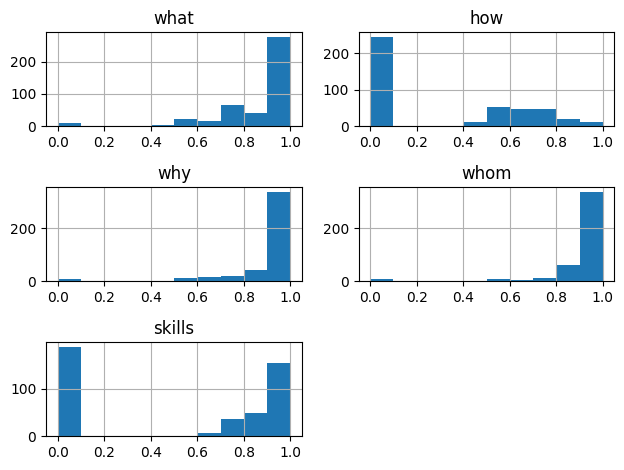

In [17]:
score_df.hist()
# Increase the white space around the plots to make them more readable
plt.tight_layout()

In [18]:
score_df.to_csv("gpt4_scores.csv")

In [21]:
prev_scores = pd.read_csv("gpt3.5_scores.csv", index_col=0)

In [22]:
prev_scores.describe()

,what,how,why,whom,skills
count,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.839335,0.285780,0.828968,0.906583,0.510413
std,0.171146,0.325541,0.147015,0.151353,0.442718
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.720000,0.000000,0.740000,0.830000,0.000000
50%,0.850000,0.000000,0.865000,1.000000,0.710000
75%,1.000000,0.610000,0.930000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
score_df.describe()

,what,how,why,whom,skills
count,437.000000,437.000000,437.000000,437.000000,437.000000
mean,0.880984,0.298490,0.925469,0.932883,0.522265
std,0.191055,0.348872,0.173054,0.167541,0.463278
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.780000,0.000000,0.940000,0.960000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.770000
75%,1.000000,0.640000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


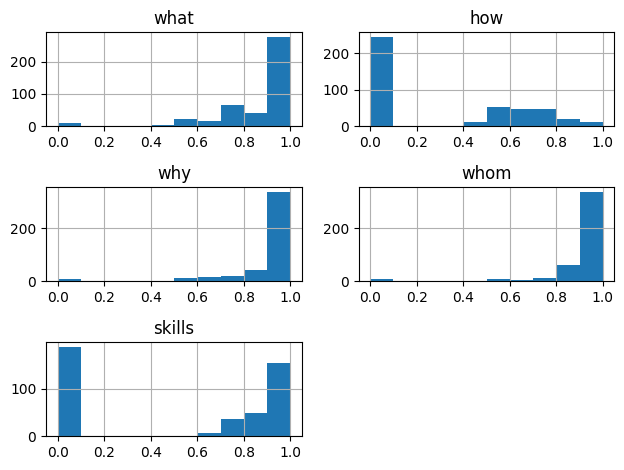

In [25]:
score_df.hist()
plt.tight_layout()

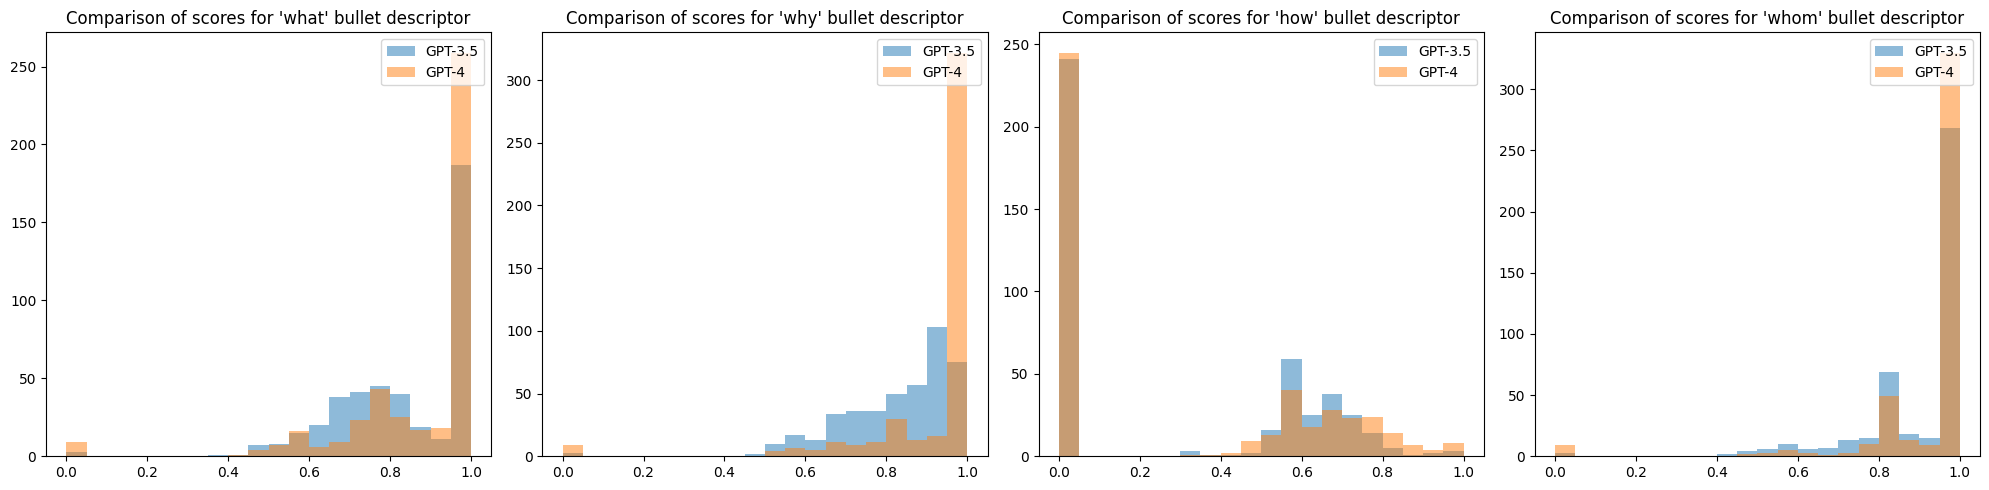

In [59]:
import matplotlib.pyplot as plt

#Now I want one plot with all subplots for each of the three bullet descriptors
fig, axs = plt.subplots(1, 4, figsize=(20,5))
axs[0].hist(prev_scores["what"], bins=20, alpha=0.5, label='GPT-3.5')
axs[0].hist(score_df["what"], bins=20, alpha=0.5, label='GPT-4')
axs[0].legend(loc='upper right')
axs[0].set_title("Comparison of scores for 'what' bullet descriptor")
axs[1].hist(prev_scores["why"], bins=20, alpha=0.5, label='GPT-3.5')
axs[1].hist(score_df["why"], bins=20, alpha=0.5, label='GPT-4')
axs[1].legend(loc='upper right')
axs[1].set_title("Comparison of scores for 'why' bullet descriptor")
axs[2].hist(prev_scores["how"], bins=20, alpha=0.5, label='GPT-3.5')
axs[2].hist(score_df["how"], bins=20, alpha=0.5, label='GPT-4')
axs[2].legend(loc='upper right')
axs[2].set_title("Comparison of scores for 'how' bullet descriptor")
axs[3].hist(prev_scores["whom"], bins=20, alpha=0.5, label='GPT-3.5')
axs[3].hist(score_df["whom"], bins=20, alpha=0.5, label='GPT-4')
axs[3].legend(loc='upper right')
axs[3].set_title("Comparison of scores for 'whom' bullet descriptor")
plt.tight_layout()
#Make sure titles don't overlap
plt.show()